# Oppg 1, Listeria

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
import researchpy as rp
import scipy.stats as stats

## 1a)

In [2]:
listeria = pd.read_csv('Listeria.csv', sep=';')

In [3]:
summary_listeria = rp.summary_cont(listeria.groupby(['HamTopping'])['ListeriaNumber'])
model = mixedlm('ListeriaNumber~ C(HamTopping)',groups='HamTopping', data=listeria).fit()
summary_listeria

,N,Mean,SD,SE,95% Conf.,Interval
HamTopping,,,,,,
HamT1,8,204850.0,3.149049e+05,1.113357e+05,-5.841711e+04,4.681171e+05
HamT2,8,99850.0,1.428349e+05,5.049978e+04,-1.956300e+04,2.192630e+05
HamT3,8,263125.0,2.827746e+05,9.997591e+04,2.671955e+04,4.995305e+05
HamT4,8,4445762.5,3.147114e+06,1.112673e+06,1.814710e+06,7.076815e+06
HamT5,8,50037.5,8.289840e+04,2.930901e+04,-1.926730e+04,1.193423e+05
HamT6,8,4270362.5,6.685132e+06,2.363551e+06,-1.318548e+06,9.859273e+06


In [4]:
model_4_anova = ols('ListeriaNumber ~ C(HamTopping)', data=listeria).fit()
anova_table = sm.stats.anova_lm(model_4_anova)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(HamTopping),5.0,1.888313e+14,3.776627e+13,4.134863,0.003826
Residual,42.0,3.836120e+14,9.133620e+12,NaN,NaN


In [5]:
ms_tr = anova_table['mean_sq'][0]
ms_e = anova_table['mean_sq'][1]
F0 = ms_tr/ms_e
df_tr = anova_table['df'][0]
df_e = anova_table['df'][1]
alpha = 0.05
f_alpha = stats.f.ppf(1-alpha, df_tr, df_e)
print(f'Med et signifikansnivå på {alpha}, får vi en f_alpha på {round(f_alpha, 3)}.\n'
     f'F0 er på {round(F0,3)}\n'
     f'Dermed så blir forkastning = {F0 > f_alpha}')

Med et signifikansnivå på 0.05, får vi en f_alpha på 2.438.
F0 er på 4.135
Dermed så blir forkastning = True


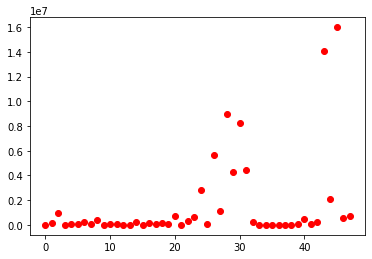

In [6]:
import matplotlib.pyplot as plt
plt.plot(listeria['ListeriaNumber'], 'ro')

## Oppg 1d)

#### Enkel logtransoformering ved å kopiere datasettet og bruke numpy.log for å få narurlig logaritmer

In [7]:
import numpy as np
ln_listeria = listeria.copy()
ln_listeria['ListeriaNumber'] = np.log(ln_listeria['ListeriaNumber'])

#### Her ser vi hvordan det gamle (øverst) kontra det nye (nederst) ser ut

In [8]:
print(listeria.head())
print(ln_listeria.head())

   ListeriaNumber HamTopping
0           24100      HamT1
1          120000      HamT1
2          961100      HamT1
3           17100      HamT1
4           81000      HamT1
   ListeriaNumber HamTopping
0       10.089967      HamT1
1       11.695247      HamT1
2       13.775834      HamT1
3        9.746834      HamT1
4       11.302204      HamT1


## oppg 1e)

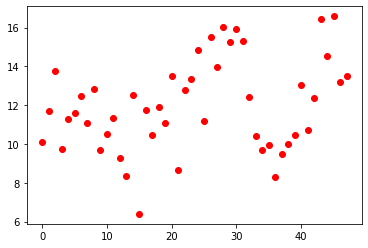

In [9]:
import matplotlib.pyplot as plt
plt.plot(ln_listeria['ListeriaNumber'], 'ro')

## oppg 1f)

### H0: sigma_t2 = 0, Ha: sigma_t2 > 0

In [10]:
import scipy.stats as stats

In [19]:
model_4_anova = ols('ListeriaNumber ~ C(HamTopping)', data=ln_listeria).fit()
ln_anova_table = sm.stats.anova_lm(model_4_anova)
print(ln_anova_table)


                 df      sum_sq    mean_sq          F    PR(>F)
C(HamTopping)   5.0  147.149539  29.429908  10.532437  0.000001
Residual       42.0  117.357092   2.794216        NaN       NaN


In [20]:
ms_tr = ln_anova_table['mean_sq'][0]
ms_e = ln_anova_table['mean_sq'][1]
F0 = ms_tr/ms_e
df_tr = ln_anova_table['df'][0]
df_e = ln_anova_table['df'][1]
alpha = 0.05
f_alpha = stats.f.ppf(1-alpha, df_tr, df_e)
print(f'Med et signifikansnivå på {alpha}, får vi en f_alpha på {round(f_alpha, 3)}.\n'
     f'F0 er på {round(F0,3)}\n'
     f'Dermed så blir forkastning = {F0 > f_alpha}')

Med et signifikansnivå på 0.05, får vi en f_alpha på 2.438.
F0 er på 10.532
Dermed så blir forkastning = True


In [21]:
from statsmodels.formula.api import mixedlm
model = mixedlm('ListeriaNumber~ C(HamTopping)',groups='HamTopping', data=listeria).fit()
print(model.summary())

                              Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            ListeriaNumber    
No. Observations:             48                 Method:                        REML              
No. Groups:                   6                  Scale:                         9133620108363.0957
Min. group size:              8                  Log-Likelihood:                -692.5364         
Max. group size:              8                  Converged:                     Yes               
Mean group size:              8.0                                                                 
--------------------------------------------------------------------------------------------------
                             Coef.            Std.Err.        z    P>|z|    [0.025       0.975]   
--------------------------------------------------------------------------------------------------
Intercept                     204850.000 

## Det under må redigeres en smule

#### Her ser vi at F = 5.1348 og P-verdien er på 0.003826, så med et signifikansnivå på 0.05, og f_alpha på 2.59,  så forkaster man H0 og aksepterer Ha.

## oppg 1g)

In [22]:
ln_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(HamTopping),5.0,147.149539,29.429908,10.532437,0.000001
Residual,42.0,117.357092,2.794216,NaN,NaN


In [23]:
mu = ln_listeria['ListeriaNumber'].mean()
sigma2 = ln_anova_table['mean_sq'][1]
sigma_t2 = (ln_anova_table['mean_sq'][0]-sigma2)/8
print(f'Mu: {mu}\nSigma2: {sigma2}\nSigma_t2: {sigma_t2}')

Mu: 11.989696029516894
Sigma2: 2.794216473691326
Sigma_t2: 3.3294614038529855


## oppg 1h)

#### Interclass correlation cofficient (ICC) er hvor mye av variansen som er forklart av treatmeantet (altså gruppene)


In [24]:
CCI = sigma_t2/(sigma_t2+sigma2)
print(f'Dette er estimatet for CCI: {CCI}')
n = 8
alpha = 0.05
df_tr = ln_anova_table['df'][0]
df_e = ln_anova_table['df'][1]
f_alpha_L = stats.f.isf(alpha/2, df_tr, df_e)
f_alpha_U = stats.f.ppf(alpha/2, df_tr, df_e)
L = (1/n)*((ms_tr/ms_e)*(1/f_alpha_L)-1)
U = (1/n)*((ms_tr/ms_e)*(1/f_alpha_U)-1)
CI_ICC = [L/(1+L), U/(1+U)]
print(f'Konfidensintervallet for CCI er:\n{CI_ICC}')

Dette er estimatet for CCI: 0.5437028972510471
Konfidensintervallet for CCI er:
[0.24873440653068443, 0.8888267351162339]


## oppg 1i)

In [25]:
mean = mu
alpha = 0.05
t_alpha = stats.t.isf((alpha)/2, df_tr)
a = 6
n = 8
se_mean = (ms_tr/(a*n))**0.5
CI_mean = [mean-(t_alpha*se_mean), mean+(t_alpha*se_mean)]
print(f'CI: {CI_mean}')

CI: [9.976874514694, 14.002517544339788]


## oppg........

In [90]:
alpha = 0.05
chi_square_left = stats.chi2.isf(alpha/2, df_e)
chi_square_right = stats.chi2.ppf(alpha/2, df_e)
CI_error = [(df_e*ms_e)/chi_square_left, (df_e*ms_e)/chi_square_right]
print(f'Konfidensintervallet for "error variance" er:\n{CI_error}')

Konfidensintervallet for "error variance" er:
[6209650208242.779, 14755068742428.512]


In [86]:
import researchpy as rp
summary_listeria = rp.summary_cont(listeria.groupby(['HamTopping'])['ListeriaNumber'])
summary_listeria

,N,Mean,SD,SE,95% Conf.,Interval
HamTopping,,,,,,
HamT1,8,204850.0,3.149049e+05,1.113357e+05,-5.841711e+04,4.681171e+05
HamT2,8,99850.0,1.428349e+05,5.049978e+04,-1.956300e+04,2.192630e+05
HamT3,8,263125.0,2.827746e+05,9.997591e+04,2.671955e+04,4.995305e+05
HamT4,8,4445762.5,3.147114e+06,1.112673e+06,1.814710e+06,7.076815e+06
HamT5,8,50037.5,8.289840e+04,2.930901e+04,-1.926730e+04,1.193423e+05
HamT6,8,4270362.5,6.685132e+06,2.363551e+06,-1.318548e+06,9.859273e+06
